Below, we analyze data from exit surveys former employees of the Department of Education, Training and Employment (DETE) and the Tachnical and Further Education (TFE).  We will attempt to answer the following key questions:

1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [50]:
import pandas as pd
import numpy as np

In [51]:
#reading in data from 2 key surveys
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [52]:
print(dete_survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [53]:
print(dete_survey['SeparationType'].value_counts())
print(dete_survey['Age'].value_counts())
print(dete_survey['Region'].value_counts())
print(dete_survey['Position'].value_counts())
print(dete_survey['Business Unit'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64
Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64
Teacher             

In [54]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [55]:
print(tafe_survey.head())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

In [56]:
print(tafe_survey['Institute'].value_counts())
print(tafe_survey['WorkArea'].value_counts())
print(tafe_survey['Reason for ceasing employment'].value_counts())

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64


In [57]:
print(tafe_survey.isnull().sum())

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

The two surveys appear to present similar information.  Specifically, they present personal information on the employee such as age, gender and tenure as well as general reasons for their departure.  However, the two surveys present the information in slightly different fashions.  Additionally, it is important to note that many of the questions were not answered by the departing employees.  In the DETE survey, one response is 'Not Stated'.  However, this is currently not being viewed as a null response.  Further, a number of columns are unnecessary for our analysis (eg. 'Aboriginal').

In [58]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [59]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [60]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

We reread the dete_survey.csv file into a dataframe and set the null value to include 'Not Stated'.  Additionally we removed columns from both the DETE and TAFE dataframes that would not help us in answering the key questions.  

In [61]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [62]:
rename = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated = tafe_survey_updated.rename(rename, axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')


In [63]:
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

We changed the formatting on the column names for the DETE dataframe for the sake of consistency.  Additionally we renamed a number of columns in the TAFE dataframe to match the names in the DETE dataframe that contain the same information.

In [64]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [65]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()
tafe_resignations = tafe_survey_updated[(tafe_survey_updated['separationtype'] == 'Resignation')].copy()

Since we are interested in answering questions regarding employees who resigned voluntarily we sliced the DETE and TAFE dataframes to include only those who listed 'resignation' as reason for separation.

In [66]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64


In [67]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
print(dete_resignations['cease_date'].value_counts())
print(tafe_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [68]:
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64


The dates look fairly reasonable for both the DETE and TAFE dataframes.  Employees in the DETE dataframe started as early as 1963 and ended anywhere between 2006 and 2014.  Employees in the TAFE dataframe ended anywhere from 2009 through 2013.  

In [69]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Since we are analyzing the different reasons for resigning between employees who have been on the job a short while and those who have been on the job for a long while, we need a column for employee tenure in both dataframes.  There already is such a column in the TAFE dataframe entitled 'institute_service'.  Since there was not a corresponding column in the DETE dataframe, we created it and used the same name.  

In [70]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [71]:
def update_vals(val):
    if pd.isnull(val):
        return
    elif val == '-':
        return False
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)

In [72]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()
print(tafe_resignations_up['dissatisfied'].value_counts())
print(dete_resignations_up['dissatisfied'].value_counts())

False    241
True      91
Name: dissatisfied, dtype: int64
False    162
True     149
Name: dissatisfied, dtype: int64


To analyze any patterns in dissatisfaction among employees who resigned, we needed to creat a column that flagged dissatisfaction.  To do this we included workers who cited some form of dissatisfaction with their job as a reason for quitting.  Specifically, in the DETE dataframe, this meant any employee who indicated that any of the following played a role in their departure: job dissatisfaction, dissatisfaction with the department, physical work environment, lack of recognition,
lack of job security, work location, employment conditions, work life balance or workload.  Similarly, those employees in the TAFE dataframe who indicated dissatisfaciton or job dissatisfaction were classified as dissatisified.

In [73]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [74]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector                           332 non-null object
Contributing Factors. Career Move - Public Sector                            332 non-null object
Contributing Factors. Career Move - Self-employment                          332 non-null object
Contributing Factors. Dissatisfaction                                        332 non-null object
Contributing Factors. Ill Health                                             332 non-null object
Contributing Factors. Interpersonal Conflict                                 332 non-null object
Contributing Factors. Job Dissatisfaction                                    332 non-null object
Contributing Factors. Maternity/Family                                       332 non-null object
Contributing Factors. NONE                                                   332 non-null object
Contributing Factors. 

In [89]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()
print(combined_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB
None


Before finally combining the two dataframes, we added a column to each indicating where the specific entry came from (DETE or TAFE) so that we can track them in the combined dataframe.  Then we concatenated the two dataframes and created a new index.  We also eliminated all columns with more than 500 null entries since these columns will not be useful in answering the key questions.  

In [90]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
print(combined_updated['institute_service'].value_counts())

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
22.0                   6
12.0                   6
14.0                   6
17.0                   6
10.0                   6
16.0                   5
18.0                   5
24.0                   4
23.0                   4
11.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
28.0                   2
26.0                   2
36.0                   2
25.0                   2
30.0                   2


In [91]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].str.replace('Less than 1 year', '1.0').str.replace('1-2', '2.0').str.replace('3-4', '3.0').str.replace('5-6', '6.0').str.replace('7-10', '9.0').str.replace('11-20', '16.0').str.replace('More than 20 years', '25.0')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
print(combined_updated['institute_service_up'].value_counts())

1.0     95
3.0     83
2.0     78
6.0     50
9.0     35
12.0    32
5.0     23
0.0     20
4.0     16
7.0     13
25.0    12
13.0     8
8.0      8
20.0     7
15.0     7
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
21.0     3
39.0     3
19.0     3
32.0     3
36.0     2
30.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service_up, dtype: int64


In [97]:
def convert_to_class(val):
    if pd.isnull(val):
        return
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(convert_to_class)
print(combined_updated['service_cat'].value_counts())

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


Instead of analyzing each individual year of tenure, we thought it would make sense to generalize and place the employees in the following categories:
New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company
Thus we created a new column, 'service_cat', which classifies each employee in this manner based on 'institute_service'.

In [98]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


In [100]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


In [106]:
table = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')

In [108]:
table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


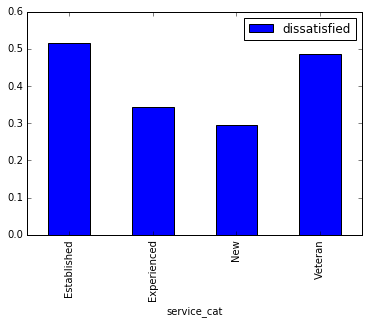

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
table.plot(kind='bar')

Interestingly, it seems that the longer an employees has been on the job, the more likely that he or she is dissatisfied.  Fully half of the Established (7 to 11 years on the job) and Veteran workers (greater than 11 years) left at least partly due to some dissatisfaction.  Only 1/3 of the Experienced workers (3 to 6 years on the job) cited some dissatisfaction as a reason for leaving while less than 30% of the New employees (less than 3 years on the job) were dissatisfied.  